# Unsupervised Learning

In [1]:
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
# change column name
df.columns = ['customer_id','gender', 'age', 'annual_income', 'spending_score']

df['gender'] = df['gender'].replace(['Female', 'Male'], [0,1])

/tmp/ipykernel_371260/2628508463.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace(['Female', 'Male'], [0,1])


In [3]:
df

,customer_id,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [4]:
from sklearn.cluster import KMeans

X = df.drop(['customer_id', 'gender'], axis = 1)

clusters = []
for i in range(1,11):
    km = KMeans(n_clusters = i).fit(X)
    clusters.append(km.inertia_)

Text(0, 0.5, 'inertia')

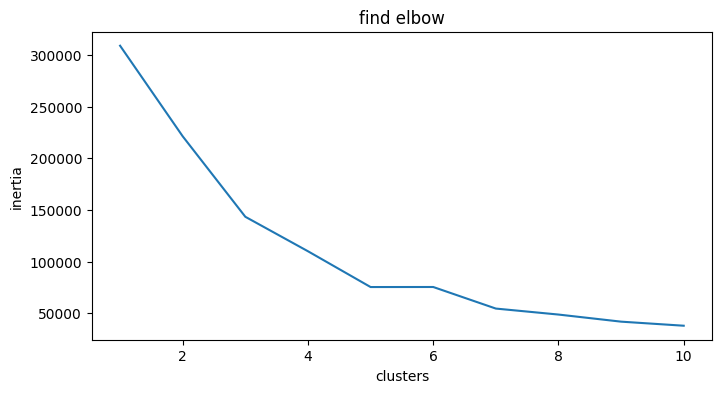

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig, ax = plt.subplots(figsize = (8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('find elbow')
ax.set_xlabel('clusters')
ax.set_ylabel('inertia')

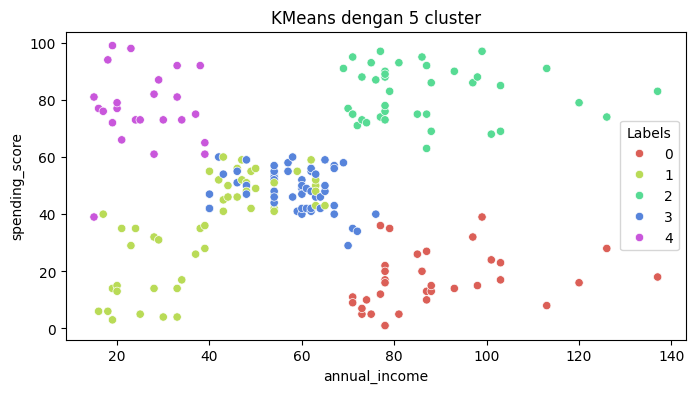

In [6]:
km5 = KMeans(n_clusters=5).fit(X)

X['Labels'] = km5.labels_

plt.figure(figsize=(8,4))
sns.scatterplot(x=X['annual_income'], y=X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 cluster')
plt.show()